Lets, learn how to use the Logistic Regression and predict whether a person will buy a insurance or not from their age, we will be using a insurance dataset for this model

First import all the necessary modules

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

Load the insurance dataset

In [2]:
df = pd.read_csv("E:\Data Science\datasets\insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Now, lets scatter plot the dataframe to visualise it clearly

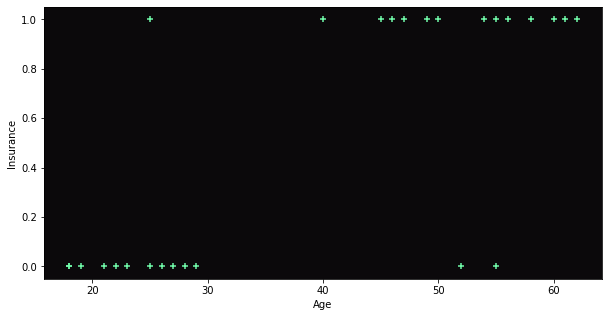

In [3]:
plt.rcParams['axes.facecolor'] = '#0B090B'
plt.rcParams["figure.figsize"] = (10,5)
# plt.tick_params(axis='both', colors='#fff')
# plt.gca().spines['left'].set_color('#fff')
# plt.gca().spines['bottom'].set_color('#fff')
# mpl.rc('axes', labelcolor='#fff')
# plt.tick_params(axis='both', colors='#fff')

plt.ylabel("Insurance")
plt.xlabel("Age")
plt.scatter(df[['age']], df.bought_insurance, marker="+", color="#71FCAA")

Split the data in train and test set

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.8)

Lets veiw the x, y test set

In [5]:
x_test

,age
20,21
15,55
23,45
3,52
8,62
7,60


In [6]:
y_test

20    0
15    1
23    1
3     0
8     1
7     1
Name: bought_insurance, dtype: int64

Now lets train our Logistic model

In [7]:
model = LogisticRegression()

In [8]:
model.fit(x_train, y_train)

LogisticRegression()

Predicting the people will buy a insurance or not from the x_test

In [9]:
model.predict(x_test)

array([0, 1, 1, 1, 1, 1], dtype=int64)

Predict a individual person insurance by giving a random age value of 37

In [10]:
model.predict([[37]])

array([0], dtype=int64)

Check the model accuracy

In [11]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9047619047619048, 0.8333333333333334)

<strong>Lets see how how the model is working</strong>

As we know, from linear regression that<br>
<em>model.coef_ indicates value of m in <strong>y = m*x + b</strong> equation</em>

In [12]:
model.coef_

array([[0.14891026]])

<em>model.intercept_ indicates value of b in <strong>y = m*x + b</strong> equation</em>

In [13]:
model.intercept_

array([-5.57319847])

So, in Logistic Regression uses the Sigmoid function
<strong>F(x) = 1/(1 + e^(-x))</strong>
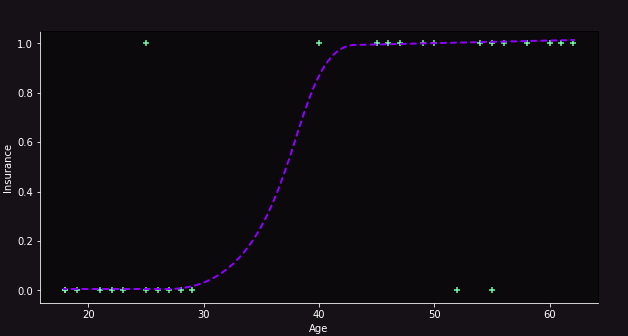

Lets defined sigmoid function now and do the math with hand

In [14]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [15]:
age = 35
prediction_function(age)

0.4850044983805899

0.485 is less than 0.5 which means person with 35 age will not buy insurance

In [16]:
age = 43
prediction_function(age)

0.568565299077705

0.568 is more than 0.5 which means person with 43 will buy the insurance